In [26]:
import os
import zipfile
import pandas as pd
import numpy as np

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
if not os.path.exists('X_train.csv'):
    with zipfile.ZipFile('../3_feature_selection/X_train.zip', 'r') as zip_ref:
        zip_ref.extractall('.')


X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop(['Unnamed: 0'], axis = 1)
X_train.head(3)

,05,10,12,14 healthy,15,16,18,18 healthy,20,21,...,Steele VR,Eckhardt AL,Biessmann F,Oh A,Horvath JC,Carter O,Sanz-Leon P,Rice GE,Braun U,semantic_cluster
0,-0.129325,-0.206861,-0.212344,-0.079717,-0.202473,-0.174646,-0.19037,-0.072391,-0.203868,-0.152652,...,0,0,0,0,0,0,0,0,0,-0.057280
1,-0.129325,-0.206861,-0.212344,-0.079717,-0.202473,-0.174646,-0.19037,-0.072391,-0.203868,-0.152652,...,0,0,0,0,0,0,0,0,0,1.215081
2,-0.129325,-0.206861,-0.212344,-0.079717,3.871988,-0.174646,-0.19037,-0.072391,-0.203868,2.707904,...,0,0,0,0,0,0,0,0,0,0.316944


In [5]:
if not os.path.exists('X_test.csv'):
    with zipfile.ZipFile('../3_feature_selection/X_test.zip', 'r') as zip_ref:
        zip_ref.extractall('.')



X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(['Unnamed: 0'], axis = 1)
X_test.head(3)

,05,10,12,14 healthy,15,16,18,18 healthy,20,21,...,Steele VR,Eckhardt AL,Biessmann F,Oh A,Horvath JC,Carter O,Sanz-Leon P,Rice GE,Braun U,semantic_cluster
0,-0.129325,-0.206861,-0.212344,-0.079717,-0.202473,-0.174646,-0.19037,-0.072391,-0.203868,-0.152652,...,0,0,0,0,0,0,0,0,0,1.589304
1,-0.129325,-0.206861,-0.212344,-0.079717,-0.202473,-0.174646,-0.19037,-0.072391,-0.203868,-0.152652,...,0,0,0,0,0,0,0,0,0,-1.554174
2,-0.129325,-0.206861,-0.212344,-0.079717,-0.202473,-0.174646,-0.19037,-0.072391,-0.203868,-0.152652,...,0,0,0,0,0,0,0,0,0,1.514459


In [6]:
y_train = pd.read_csv('../3_feature_selection/y_train.csv')
y_train = y_train.drop(['Unnamed: 0'], axis = 1)
y_train = y_train['citation_count']
y_train.head(3)

0     72.0
1     49.0
2    101.0
Name: citation_count, dtype: float64

In [7]:
y_test = pd.read_csv('../3_feature_selection/y_test.csv')
y_test = y_test.drop(['Unnamed: 0'], axis = 1)
y_test = y_test['citation_count']
y_test.head(3)

0    115.0
1     28.0
2     97.0
Name: citation_count, dtype: float64

<b><u>Ridge and Lasso:</u></b>  
First, we choose to assess Ridge and Lasso models performance on our dataset.  
Given the substantial number of features, there is a risk of overfitting.  
Therefore, applying these regularization models, which add a penalty term to control the variance (by reducing the coefficients size) might be productive. 

- Ridge is a model that adds a penalty term of lambda * sum of squared coefficients  
- Lasso is a model that adds a penalty term of lambda * sum of aboslute value of the coefficients  


In [8]:
alphas = np.linspace(0.01, 1000, 200) # regularization parameters

<b><u>Lasso:</u></b>

In [9]:
lasso_model = LassoCV(alphas=alphas, max_iter=10_000, random_state=0)
_ = lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

In [38]:
print(f'Lasso regularization parameter: {lasso_model.alpha_}')
print(f'Lasso MSE: {mean_squared_error(y_test, lasso_predictions)}')
print(f'Lasso R^2: {r2_score(y_test, lasso_predictions)}')

Lasso regularization parameter: 5.035075376884422
Lasso MSE: 48386.208532246
Lasso R^2: 0.026752684688048034


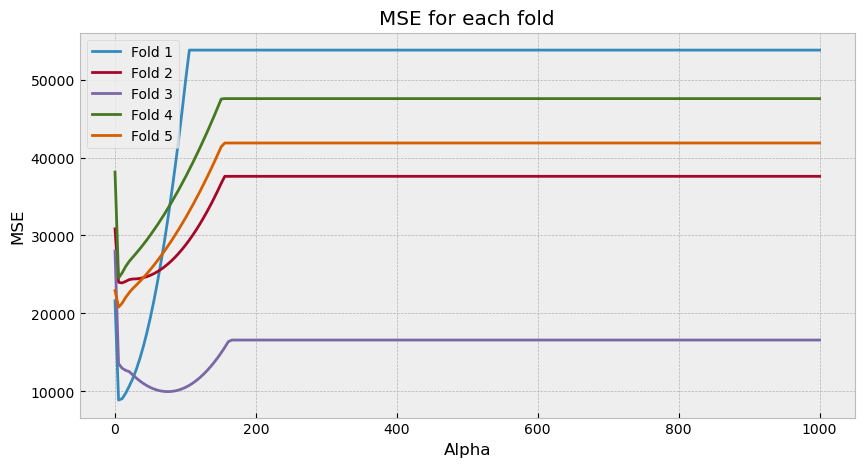

In [29]:
plt.figure(figsize=(10, 5))
for i in range(lasso_model.mse_path_.shape[1]):
    plt.plot(lasso_model.alphas_, lasso_model.mse_path_[:, i], label=f'Fold {i+1}')
plt.title('MSE for each fold')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

<b><u>Ridge:</u></b>

In [11]:
ridge_model = RidgeCV(alphas=alphas)
_ = ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

In [39]:
print(f'Ridge regularization parameter: {ridge_model.alpha_}')
print(f'Ridge MSE:{mean_squared_error(y_test, ridge_predictions)}')
print(f'Ridge R^2: {r2_score(y_test, ridge_predictions)}')

Ridge regularization parameter: 597.9939698492462
Ridge MSE:48582.426820331755
Ridge R^2: 0.022805921180688138


<b><u>Baseline:</u></b>

In [14]:
y_mean = np.mean(y_test)
baseline_predictions = np.full((len(y_test), ), y_mean)

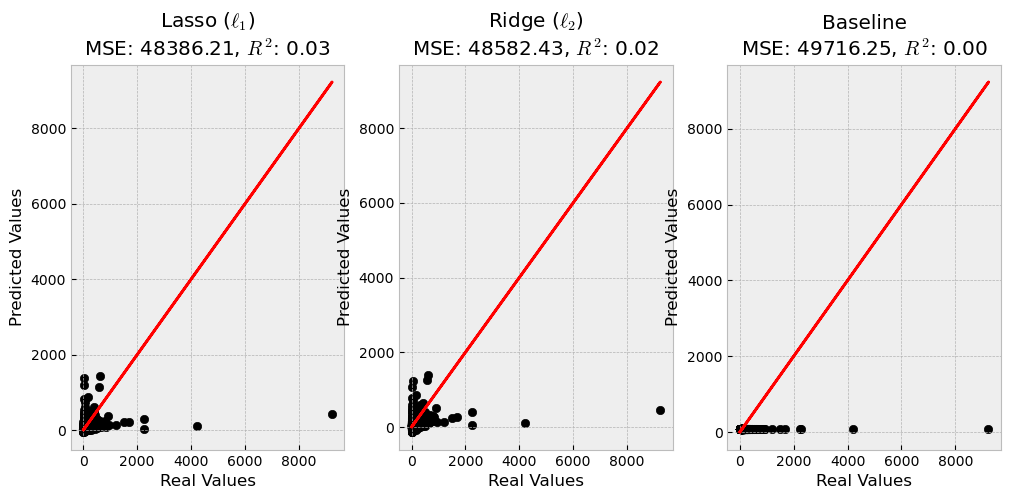

In [15]:
plt.style.use("bmh")

def plot_predictions(y: pd.Series, predictions: pd.Series, ax: plt.Axes):
    ax.scatter(y, predictions, color="black")
    ax.plot(y, y, color="red")
    ax.set_xlabel("Real Values")
    ax.set_ylabel("Predicted Values")


fig, ax = plt.subplots(ncols=3, figsize=(12, 5))

plot_predictions(y_test, lasso_predictions, ax[0])
mse,r2 = mean_squared_error(y_test, lasso_predictions), r2_score(y_test, lasso_predictions)
ax[0].set_title(
    r"""Lasso ($\ell_1$)
MSE: {:.2f}, $R^2$: {:.2f}""".format(mse, r2)
)

plot_predictions(y_test, ridge_predictions, ax[1])
mse,r2 = mean_squared_error(y_test, ridge_predictions), r2_score(y_test, ridge_predictions)
_ = ax[1].set_title(
    r"""Ridge ($\ell_2$)
MSE: {:.2f}, $R^2$: {:.2f}""".format(mse, r2)
)

plot_predictions(y_test, baseline_predictions, ax[2])
mse,r2 = mean_squared_error(y_test, baseline_predictions), r2_score(y_test, baseline_predictions)
_ = ax[2].set_title(
    r"""Baseline
MSE: {:.2f}, $R^2$: {:.2f}""".format(mse, r2)
)

<u>Conclusions:</u>  
We can observe that both Lasso and Ridge regressions improved the Basline $MSE$ and $R^2$, Ridge by around 2% and Lasso by around 3%.  
We would like to improve our prediction performance, thus we will continue evaluating alternative models:

Now, we asses <b>ElasticNet</b> performance, which combines both L1 and L2 regularization:

In [16]:
alphas = np.linspace(0.01, 100, 200) 
param_grid = {'alpha': alphas}


model_searcher1 = GridSearchCV(ElasticNet(l1_ratio=0.5,max_iter=10000, random_state=0), param_grid, cv=10, scoring='neg_mean_squared_error')

model_searcher1.fit(X_train, y_train)

best_alpha1 = model_searcher1.best_params_['alpha']
print(f"Best alpha: {best_alpha1}")

predictions1 = model_searcher1.predict(X_test)

# Model evaluation:
print(f"R^2: {r2_score(y_test, predictions1)}")
print(f"MSE: {mean_squared_error(y_test, predictions1)}")


Best alpha: 0.01
$R^2$: 0.020573186550447375
MSE: 48693.43001727494


Let's try increasing l1_ratio:

In [17]:
alphas = np.linspace(0.01, 100, 200) 
param_grid = {'alpha': alphas}

model_searcher2 = GridSearchCV(ElasticNet(l1_ratio=0.7,max_iter=10000, random_state=0), param_grid, cv=10, scoring='neg_mean_squared_error')

model_searcher2.fit(X_train, y_train)

best_alpha2 = model_searcher2.best_params_['alpha']
print(f"Best alpha: {best_alpha2}")

predictions2 = model_searcher2.predict(X_test)

# Model evaluation:
print(f"R^2: {r2_score(y_test, predictions2)}")
print(f"MSE: {mean_squared_error(y_test, predictions2)}")


Best alpha: 0.5124623115577889
R^2: 0.04399402665806462
MSE: 47529.033634548396


Let's try increasing l1_ratio more:

In [18]:
alphas = np.linspace(0.01, 100, 200) 
param_grid = {'alpha': alphas}

model_searcher3 = GridSearchCV(ElasticNet(l1_ratio=0.9,max_iter=10000, random_state=0), param_grid, cv=10, scoring='neg_mean_squared_error')

model_searcher3.fit(X_train, y_train)

best_alpha3 = model_searcher3.best_params_['alpha']
print(f"Best alpha: {best_alpha3}")

predictions3 = model_searcher3.predict(X_test)

# Model evaluation:
print(f"R^2: {r2_score(y_test, predictions3)}")
print(f"MSE: {mean_squared_error(y_test, predictions3)}")


Best alpha: 1.0149246231155777
R^2: 0.04253160666217526
MSE: 47601.73967521202


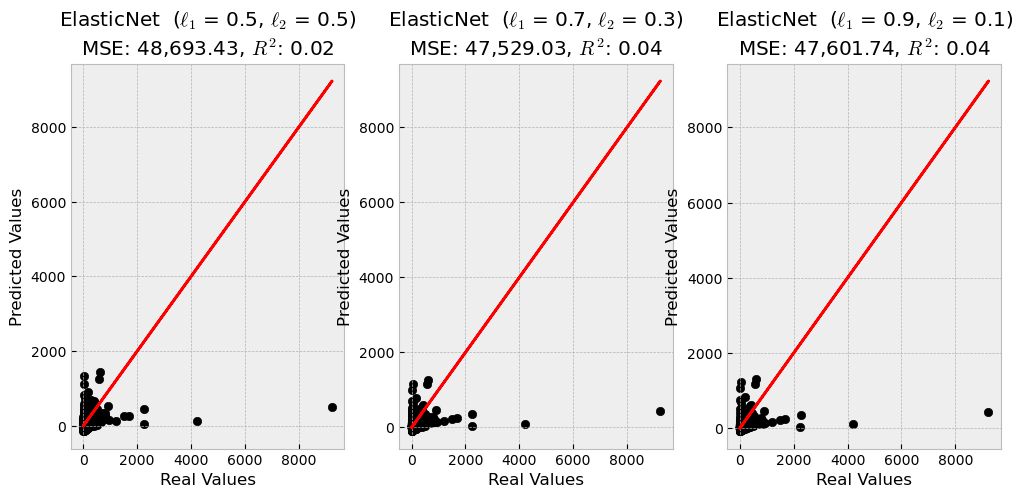

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))

plot_predictions(y_test, predictions1, ax[0])
mse,r2 = mean_squared_error(y_test, predictions1), r2_score(y_test, predictions1)
ax[0].set_title(
    r"""ElasticNet  ($\ell_1$ = 0.5, $\ell_2$ = 0.5)
MSE: {:,.2f}, $R^2$: {:.2f}""".format(mse, r2)
)

plot_predictions(y_test, predictions2, ax[1])
mse,r2 = mean_squared_error(y_test, predictions2), r2_score(y_test, predictions2)
_ = ax[1].set_title(
    r"""ElasticNet  ($\ell_1$ = 0.7, $\ell_2$ = 0.3)
MSE: {:,.2f}, $R^2$: {:.2f}""".format(mse, r2)
)

plot_predictions(y_test, predictions3, ax[2])
mse,r2 = mean_squared_error(y_test, predictions3), r2_score(y_test, predictions3)
_ = ax[2].set_title(
    r"""ElasticNet  ($\ell_1$ = 0.9, $\ell_2$ = 0.1)
MSE: {:,.2f}, $R^2$: {:.2f}""".format(mse, r2)
)

<u>Conclusions:</u>  
We can observe that applying ElasticNet with a larger l1 ratio improved the prediction performance.  
Comparing to the baseline results, ElasticNet model succeeded to improve the resuls by around 4%

<b><u>Random Forest:</u></b>

In [23]:
param_grid = {
    'n_estimators': [20, 50, 80, 100, 120],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

rf_model = RandomForestRegressor(random_state=0)

model_searcher = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10)

model_searcher.fit(X_train, y_train)

print(f"Best parameters: {model_searcher.best_params_}")

# Apply the selected model:
predictions = model_searcher.predict(X_test)

# Model evaluation:
print(f"R^2: {r2_score(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")

Best parameters: {'max_features': 0.5, 'n_estimators': 80}
R^2: 0.06233517240465147
MSE: 46617.180615431454


<b><u>Feature Importance:</u></b>

In [25]:
best_model = model_searcher.best_estimator_
importances = best_model.feature_importances_

df_importances = pd.DataFrame(list(zip(X_train.columns, importances)), 
                              columns=['Feature', 'Importance'])

df_importances = df_importances.sort_values(by='Importance', ascending=False)

df_importances.head(50)

,Feature,Importance
1065,authors_group_rank,0.389018
1064,number_of_authors,0.028803
1439,Deprez S,0.027158
1063,years_since_publication,0.019966
327,exhibiting,0.019723
1002,year_published,0.015937
197,correlating,0.015345
1440,Amant F,0.014612
544,memory task,0.014336
1201,Krasnow B,0.012537


<b><u>Gradient Boosting:</u></b>

In [24]:
param_grid = {'n_estimators': [20, 50, 80, 100, 120]}

gbr = GradientBoostingRegressor(random_state=0)

model_search = GridSearchCV(gbr, param_grid, cv=10, scoring='neg_mean_squared_error')

model_search.fit(X_train, y_train)

best_n_estimators = model_search.best_params_['n_estimators']
print(f'Best n_estimators: {best_n_estimators}')

predictions = model_search.predict(X_test)

# Print the performance
print(f"R^2: {r2_score(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")


Best n_estimators: 50
R^2: 0.0429572574557745
MSE: 47580.57791320458


<b><u>Summary:</u></b>

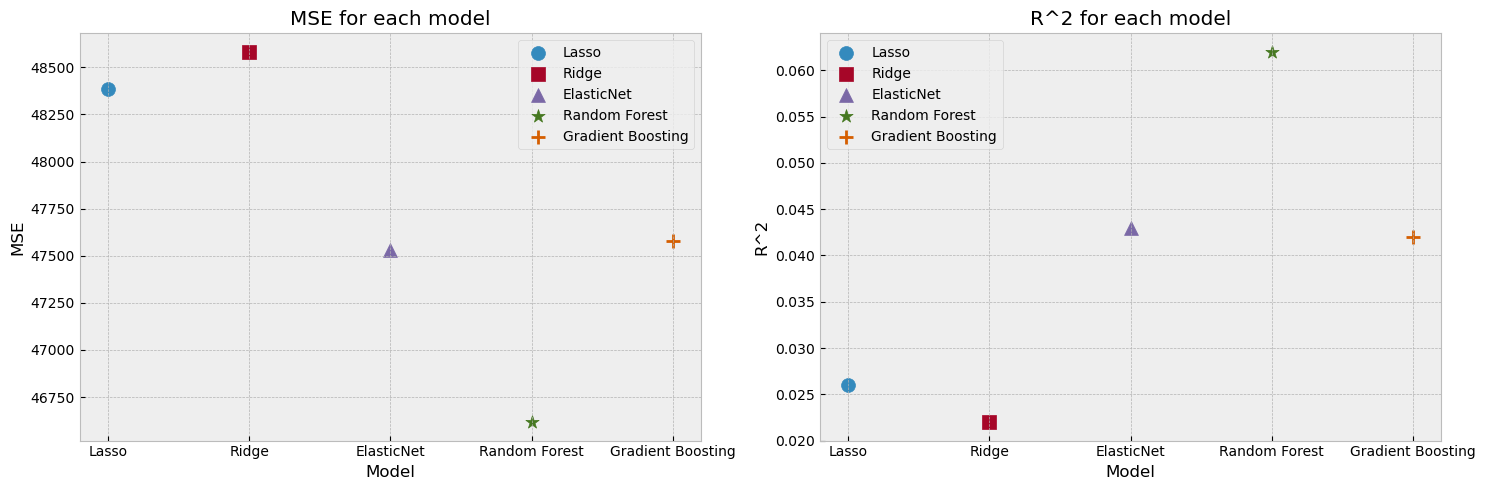

In [46]:
mse_values = [48386.20, 48582.42, 47529.03, 46617.180 ,47580.577]
r2_values = [0.026, 0.022, 0.043, 0.062, 0.042]

model_names = ['Lasso', 'Ridge', 'ElasticNet', 'Random Forest', 'Gradient Boosting']

markers = ['o', 's', '^', '*', '+']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot MSE values
for i in range(len(model_names)):
    axs[0].scatter(model_names[i], mse_values[i], marker=markers[i], label=model_names[i], s=100)
axs[0].set_title('MSE for each model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('MSE')
axs[0].legend()

# Plot R^2 values
for i in range(len(model_names)):
    axs[1].scatter(model_names[i], r2_values[i], marker=markers[i], label=model_names[i], s=100)
axs[1].set_title('R^2 for each model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('R^2')
axs[1].legend()

# Display the figure
plt.tight_layout()
plt.show()

Comparing the results of the models that we evaluated,  
<b>Random Forest</b> outperformed the others, delivering the most optimal results in terms of MSE and R^2.  
It improved the baseline results by around 7%.